# India Covid-19 project
![image](https://www.roojai.com/wp-content/themes/roojai-kit-3/assets/img/covid/covid-desc-1.jpg)

This project aim to
* Examine the peak of covid situation in India
     * Find the state with the highest number of covid cases and deaths
     * Determine what vaccine India mainly uses and how India people are vaccinated
     * See how india tested covid each month 
     
The dataset is available in this [link](https://www.kaggle.com/sudalairajkumar/covid19-in-india)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
%matplotlib inline 


1st we need to Import library and explore the dataset

In [2]:
covid_df = pd.read_csv('covid_19_india.csv')
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')
test_df = pd.read_csv('StatewiseTestingDetails.csv')

In [3]:
covid_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


# Data cleaning
we will drop some column that aren't revelent to our objective and a lot of missing values like ConfirmedForeignNational,ConfirmedIndianNational tand change the columns name to make our work easier

In [5]:
covid_df.drop(['Sno','ConfirmedForeignNational','ConfirmedIndianNational','Time'],axis = 1,inplace = True)
covid_df.columns = ['date','state','cured','death','confirmed']

In this project we aim to examine the data by month so we only keep only yearmonth from date

In [6]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['yearmonth'] = covid_df['date'].dt.strftime('%Y-%m')

In [7]:
covid_df.isnull().sum()

date         0
state        0
cured        0
death        0
confirmed    0
yearmonth    0
dtype: int64

There is no missing value let's examine state columns

In [8]:
set(covid_df['state'])

{'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Bihar****',
 'Cases being reassigned to states',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Himanchal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karanataka',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Madhya Pradesh***',
 'Maharashtra',
 'Maharashtra***',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Telengana',
 'Tripura',
 'Unassigned',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

There are a lot of mistyped states like Telengana that should be Telangana and there are some states with * after their names 

In [9]:
covid_df['state'] = covid_df['state'].str.replace('*','',regex = False)
covid_df['state'] = covid_df['state'].str.replace('Dadra and Nagar Haveli and Daman and Diu','Dadra & Nagar Haveli and Daman & Diu',regex = False)
covid_df['state'] = covid_df['state'].str.replace('Himanchal Pradesh','Himachal Pradesh')
covid_df['state'] = covid_df['state'].str.replace('Jammu and Kashmir','Jammu & Kashmir')
covid_df['state'] = covid_df['state'].str.replace('Karanataka','Karnataka')
covid_df['state'] = covid_df['state'].str.replace('Telengana','Telangana')
covid_df.loc[2890,'state'] = 'Dadra & Nagar Haveli and Daman & Diu'
covid_df.loc[[15633,15669],'state'] = 'Dadra & Nagar Haveli and Daman & Diu'

In [10]:
# See the change we made
covid_df['state'].value_counts()

Kerala                                  560
Delhi                                   528
Telangana                               528
Rajasthan                               527
Uttar Pradesh                           526
Haryana                                 526
Ladakh                                  523
Tamil Nadu                              523
Punjab                                  521
Jammu & Kashmir                         521
Maharashtra                             521
Karnataka                               521
Andhra Pradesh                          518
Uttarakhand                             515
Odisha                                  514
Puducherry                              512
West Bengal                             512
Chhattisgarh                            511
Chandigarh                              511
Gujarat                                 510
Himachal Pradesh                        509
Madhya Pradesh                          509
Bihar                           

There are unassigned state and cases being reassigned to states we will drop these row

In [11]:
remove_df = covid_df[(covid_df['state'] == 'Cases being reassigned to states') | (covid_df['state'] == 'Unassigned')]
covid_df.drop(remove_df.index,inplace = True)

In [12]:
# See the change we made
covid_df['state'].value_counts()

Kerala                                  560
Delhi                                   528
Telangana                               528
Rajasthan                               527
Uttar Pradesh                           526
Haryana                                 526
Ladakh                                  523
Tamil Nadu                              523
Punjab                                  521
Jammu & Kashmir                         521
Karnataka                               521
Maharashtra                             521
Andhra Pradesh                          518
Uttarakhand                             515
Odisha                                  514
Puducherry                              512
West Bengal                             512
Chandigarh                              511
Chhattisgarh                            511
Gujarat                                 510
Himachal Pradesh                        509
Madhya Pradesh                          509
Bihar                           

# The overall covid situation
let's see the overall covid situation of india as every rows of this dataset is cumulative so in order to show covid case each month we need to see the maximum value of each state and sum

In [13]:
state_pivot = pd.pivot_table(covid_df,values = ['cured','death','confirmed',],index = ['yearmonth','state'],aggfunc = max)
state_pivot.reset_index()
overall_covid = state_pivot.groupby('yearmonth').sum()

In [14]:
overall_covid

,confirmed,cured,death
yearmonth,,,
2020-01,1,0,0
2020-02,3,0,0
2020-03,1359,124,35
2020-04,33331,8373,1075
2020-05,176652,86984,5165
2020-06,559836,334822,16893
2020-07,1638870,1057805,35747
2020-08,3621245,2774801,64469
2020-09,6225763,5187825,97497


We need to find the covid growth each year

In [15]:
overall_covid['case growth'] = overall_covid['confirmed'].diff()
overall_covid['cure growth'] = overall_covid['cured'].diff()
overall_covid['death growth'] = overall_covid['death'].diff()
overall_covid

,confirmed,cured,death,case growth,cure growth,death growth
yearmonth,,,,,,
2020-01,1,0,0,NaN,NaN,NaN
2020-02,3,0,0,2.0,0.0,0.0
2020-03,1359,124,35,1356.0,124.0,35.0
2020-04,33331,8373,1075,31972.0,8249.0,1040.0
2020-05,176652,86984,5165,143321.0,78611.0,4090.0
2020-06,559836,334822,16893,383184.0,247838.0,11728.0
2020-07,1638870,1057805,35747,1079034.0,722983.0,18854.0
2020-08,3621245,2774801,64469,1982375.0,1716996.0,28722.0
2020-09,6225763,5187825,97497,2604518.0,2413024.0,33028.0


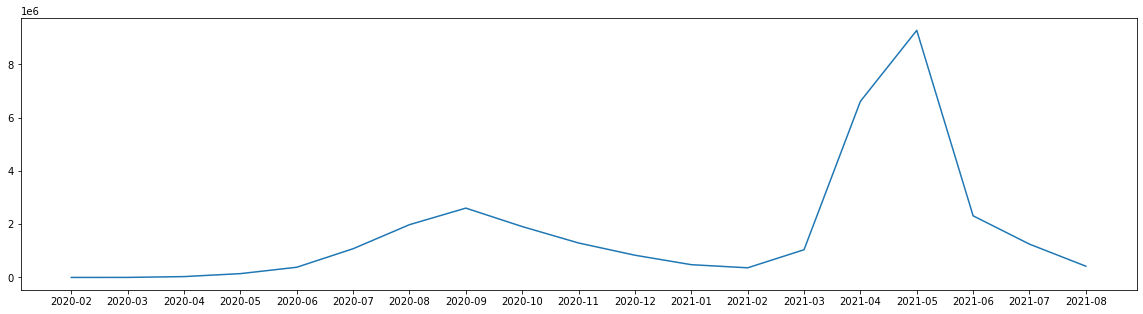

In [16]:
fig,axes = plt.subplots(1,1,figsize = (20,5))
axes.plot(overall_covid.index,overall_covid['case growth'])


There were 2 wave of covid the first one was around 2020-09 and the second one was around 2021-05 so we will call 2021-03 to 2021-07 as the second wave of covid. Let's make the plot look more intuitive

In [17]:
overall_covid_peak = overall_covid.copy()['2021-03':'2021-07']
overall_covid_peak

,confirmed,cured,death,case growth,cure growth,death growth
yearmonth,,,,,,
2021-03,12149335,11434301,162468,1040882.0,659132.0,5417.0
2021-04,18764900,15384418,208330,6615565.0,3950117.0,45862.0
2021-05,28047534,25692342,329100,9282634.0,10307924.0,120770.0
2021-06,30362848,29427330,398454,2315314.0,3734988.0,69354.0
2021-07,31613993,30781263,423810,1251145.0,1353933.0,25356.0


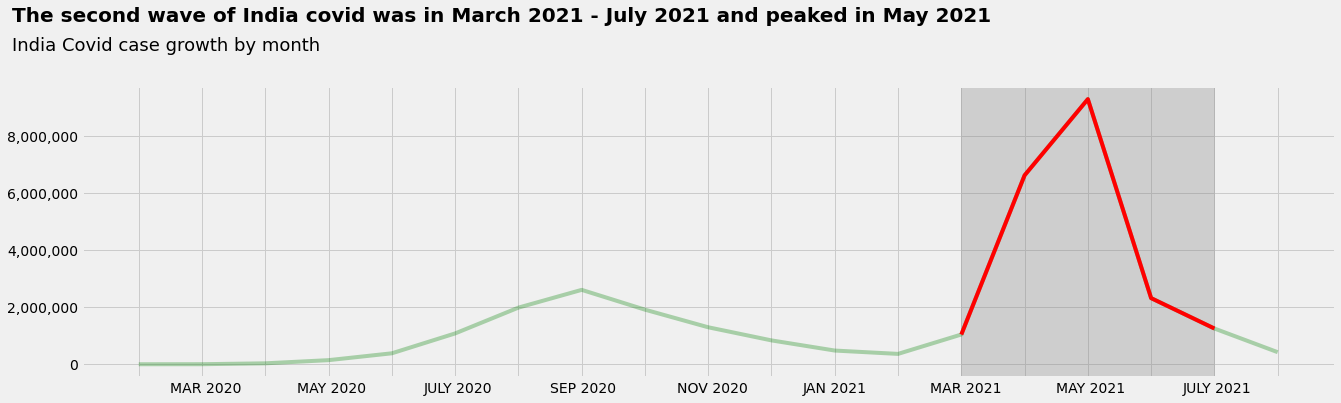

In [18]:
plt.style.use('fivethirtyeight')
#Covid case increase each month 
fig,axes = plt.subplots(1,1,figsize = (20,5))
axes.ticklabel_format(style = 'plain')
#adding plot
axes.plot(overall_covid.index,overall_covid['case growth'],color = 'Green',alpha = 0.3)

#highlight
axes.plot(overall_covid_peak.index,overall_covid_peak['case growth'],color = 'red')

# Highlihting the peak of the crisis
axes.axvspan(xmin=14.0, xmax=18.0, ymin=0,
           alpha=0.3, color='grey')

#adding text
axes.text(-1,12000000,"The second wave of India covid was in March 2021 - July 2021 and peaked in May 2021",size = 20,
        weight='bold')
axes.text(-1,11000000,"India Covid case growth by month",size = 18)


#change xticks
y = -1000000
x = 1.5
for month in ['MAR 2020','MAY 2020','JULY 2020','SEP 2020','NOV 2020','JAN 2021','MAR 2021','MAY 2021','JULY 2021']:
    axes.text(x,y,month)
    x += 2

axes.set_xticklabels([])
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# How each state affect by covid
In this section we will determined top 10 states that are most affect by covid (most death, and most case) in the second wave. 

In [19]:
after_wave = state_pivot.loc['2021-07'].groupby('state').max().sort_index()
before_wave = state_pivot.loc['2021-02'].groupby('state').max().sort_index()
between_wave = after_wave - before_wave

In [20]:
between_wave

,confirmed,cured,death
state,,,
Andaman and Nicobar Islands,2517,2446,67
Andhra Pradesh,1074318,1047602,6185
Arunachal Pradesh,31020,26711,170
Assam,347682,331321,4149
Bihar,462282,454126,8102
Chandigarh,40233,40095,459
Chhattisgarh,689487,680599,9690
Dadra & Nagar Haveli and Daman & Diu,7238,7210,2
Delhi,797115,783699,14143


In [21]:
top_10_case = after_wave.sort_values('confirmed').tail(10)
top_10_death = after_wave.sort_values('death').tail(10)
least_10_case = after_wave.sort_values('confirmed').head(10)

In [22]:
top_10_death

,confirmed,cured,death
state,,,
Andhra Pradesh,1964117,1929565,13354
Chhattisgarh,1001906,986418,13523
Punjab,599053,582217,16292
Kerala,3370137,3192104,16701
West Bengal,1527250,1497951,18128
Uttar Pradesh,1708410,1684925,22756
Delhi,1436207,1410575,25052
Tamil Nadu,2557611,2502627,34050
Karnataka,2903137,2843110,36525


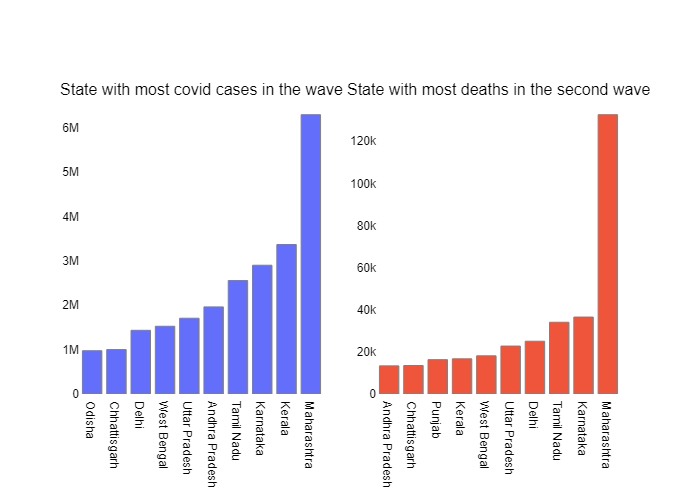

In [23]:
fig1 = make_subplots(1,2,subplot_titles=("State with most covid cases in the wave", 
                                      "State with most deaths in the second wave"))
fig1.add_trace(go.Bar(x = top_10_case.index,y = top_10_case['confirmed'],name = 'Covid case'))
fig1.add_trace(go.Bar(x = top_10_death.index,y = top_10_death['death'],name = 'Deaths'),row=1,col=2)
fig1.update_traces(marker_line_color='Gray',
                    marker_line_width=1)
fig1.update_layout(showlegend=False, 
                    plot_bgcolor='rgba(0,0,0,0)',
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))
fig1.show('png')

Maharashtra was the most affect state in term of both death and confirm covid case

# How india test covid
in this section we will examine how india test covid by month

## Clean india covid test dataset

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


In [25]:
test_df

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


we will change the column name, make yearmonth column like India covid dataset and fill null values on negative test column

In [26]:
test_df.columns = ['date','state','total','negative','positive']
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['negative']  = test_df['negative'].fillna(0)
test_df.loc[10725,'negative'] = '0'
test_df['negative'] = test_df['negative'].astype(float)
test_df['yearmonth'] = test_df['date'].dt.strftime('%Y-%m')

We need to find the total covid test by month

In [27]:
test_pivot = pd.pivot_table(test_df,columns = 'state',values = 'total',index = 'yearmonth',aggfunc = max)
test_pivot['total'] = test_pivot.sum(axis =1)
test_pivot['testbymonth'] = test_pivot['total'].diff()
test_pivot

state,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,total,testbymonth
yearmonth,,,,,,,,,,,,,,,,,,,,,
2020-04,2848.0,94558.0,694.0,9520.0,22672.0,1147.0,17541.0,3464.0,47225.0,2031.0,...,103704.0,NaN,119748.0,19278.0,3215.0,78013.0,6565.0,16525.0,1003252.0,NaN
2020-05,7706.0,372748.0,8283.0,109097.0,75737.0,4785.0,69152.0,11477.0,212784.0,19491.0,...,409777.0,2925.0,491962.0,23388.0,27475.0,289892.0,30438.0,203751.0,4251425.0,3248173.0
2020-06,15709.0,890190.0,24237.0,412214.0,220890.0,7689.0,160650.0,32031.0,531752.0,66491.0,...,824213.0,10535.0,1170683.0,88563.0,64478.0,727793.0,69024.0,488038.0,9916052.0,5664627.0
2020-07,24038.0,1951776.0,81865.0,917395.0,548172.0,13959.0,316127.0,42403.0,1032785.0,131318.0,...,1526962.0,24939.0,2658138.0,437582.0,170834.0,2325428.0,168113.0,893400.0,22084442.0,12168390.0
2020-08,33485.0,3722912.0,167615.0,2262827.0,3187161.0,30377.0,582540.0,54194.0,1583485.0,199224.0,...,2314603.0,41270.0,4813147.0,1365582.0,271170.0,5626897.0,394015.0,1887635.0,47522603.0,25438161.0
2020-09,58763.0,5806558.0,248439.0,3523430.0,7266150.0,77489.0,1106612.0,65953.0,3079965.0,254801.0,...,3118797.0,50232.0,7354050.0,2996001.0,388672.0,10098896.0,712124.0,3227462.0,82475863.0,34953260.0
2020-10,88453.0,8028905.0,318479.0,4657839.0,10923023.0,107015.0,1809446.0,72410.0,4680695.0,300548.0,...,3732880.0,56566.0,9956210.0,4281991.0,458380.0,14863388.0,1034819.0,4556425.0,117463021.0,34987158.0
2020-11,129389.0,10057854.0,359123.0,5314189.0,14664431.0,142326.0,2563606.0,NaN,6288065.0,348871.0,...,4411509.0,62596.0,12060001.0,5453461.0,526407.0,19322658.0,1340279.0,5872933.0,150542664.0,33079643.0
2020-12,181640.0,11825566.0,378151.0,5997450.0,18336722.0,181186.0,3514707.0,NaN,8659830.0,399206.0,...,5265204.0,68828.0,14191494.0,6882694.0,578723.0,23943169.0,1777371.0,7110430.0,184780444.0,34237780.0


## Data visualization

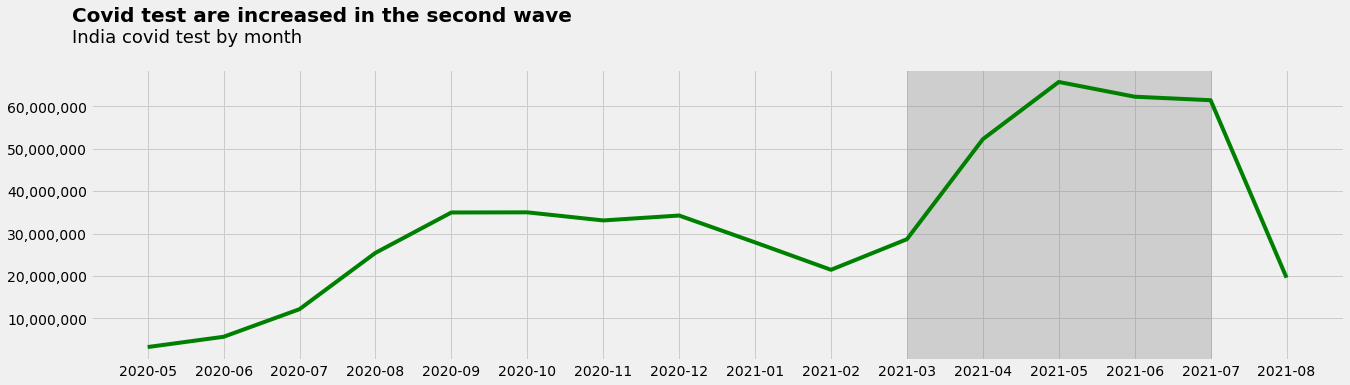

In [28]:
#Covid test increase each month 
fig,axes = plt.subplots(1,1,figsize = (20,5))
axes.ticklabel_format(style = 'plain')
axes.plot(test_pivot.index,test_pivot['testbymonth'],color = 'green')
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes.text(0,80000000,'Covid test are increased in the second wave',weight = 'bold',size = 20)
axes.text(0,75000000,'India covid test by month',size = 18)

axes.axvspan(xmin=11.0, xmax=15.0, ymin=0,
           alpha=0.3, color='grey')


Covid test in india is increasing as well in the second wave

# How india spread vaccine
in this section we will look into what vaccine india uses and which state get the most vaccines and what is India main vaccine.
## Clean india vaccine dataset

In [29]:
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


let's drop some irrelevent columns

In [30]:
vaccine_df.drop(['Male (Doses Administered)','Female (Doses Administered)'
                ,'Transgender (Doses Administered)','Male(Individuals Vaccinated)'
                ,'Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)','Sessions'
                ,' Sites ','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)'
                ,'60+ Years (Doses Administered)','18-44 Years(Individuals Vaccinated)',
                 '45-60 Years(Individuals Vaccinated)','60+ Years(Individuals Vaccinated)'
                ,'Total Individuals Vaccinated'],axis = 1,inplace = True)

In [31]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Updated On                       7845 non-null   object 
 1   State                            7845 non-null   object 
 2   Total Doses Administered         7621 non-null   float64
 3   First Dose Administered          7621 non-null   float64
 4   Second Dose Administered         7621 non-null   float64
 5    Covaxin (Doses Administered)    7621 non-null   float64
 6   CoviShield (Doses Administered)  7621 non-null   float64
 7   Sputnik V (Doses Administered)   2995 non-null   float64
 8   AEFI                             5438 non-null   float64
dtypes: float64(7), object(2)
memory usage: 551.7+ KB


There are some null value we will fill it by zero and change some columns name

In [32]:
vaccine_df['Updated On'] = pd.to_datetime(vaccine_df['Updated On'],format = '%d/%m/%Y')
vaccine_df.columns = ['date','state','total dose','first dose','second dose','covaxin','covishield','sputnik v','AEFI']
vaccine_df.fillna(0,inplace = True)

We will examine state columns for misstyped state

In [33]:
set(vaccine_df['state'])

{'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'India',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

we will drop state name india

In [34]:
drop = vaccine_df[vaccine_df['state'] == 'India']
vaccine_df.drop(drop.index,inplace = True)

# What vaccine India uses most

In [35]:
vaccine_pivot = pd.pivot_table(vaccine_df,values = ['covaxin','covishield','sputnik v'],index = ['state'],aggfunc = max)
vaccine_summary = pd.DataFrame({'state':['Total'],'covaxin' : [vaccine_pivot['covaxin'].sum()],'covishield' : [vaccine_pivot['covishield'].sum()],
         'sputnik v':[vaccine_pivot['sputnik v'].sum()]})
vaccine_summary

,state,covaxin,covishield,sputnik v
0,Total,62368389.0,446825051.0,588041.0


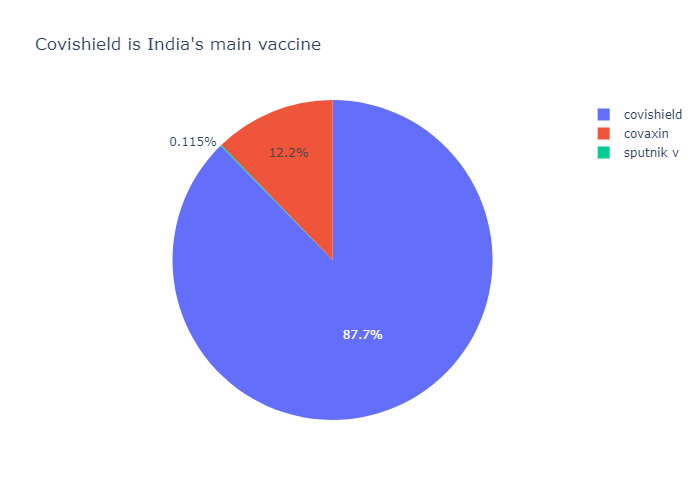

In [36]:
fig = px.pie(vaccine_summary,values = vaccine_summary.loc[0,['covaxin','covishield','sputnik v']],names = ['covaxin','covishield','sputnik v'],title= "Covishield is India's main vaccine"
)
fig.show('png')

Covishield is the most used vaccine in India while Sputnik v is rarely used

# How indian are vaccined

In [37]:
vaccine_df['yearmonth'] = vaccine_df['date'].dt.strftime('%Y-%m')
vaccine_before = vaccine_df[vaccine_df['date'] < '2021-03-01']
vaccine_peak = vaccine_df[(vaccine_df['date']>'2021-03-01') & (vaccine_df['date']<'2021-08-01')]
vaccine_peak_pivot = pd.pivot_table(vaccine_peak,values = ['total dose'],index = 'yearmonth',columns ='state',aggfunc = max)
vaccine_before_pivot = pd.pivot_table(vaccine_before,values = ['total dose'],index = 'yearmonth',columns ='state',aggfunc = max)
vaccine_peak = (vaccine_peak_pivot.loc['2021-07'] - vaccine_before_pivot.loc['2021-02'])


In [38]:
top_10_vaccine = vaccine_peak.sort_values().tail(10).reset_index()
top_10_vaccine.drop('level_0',axis =1,inplace=True)
top_10_vaccine.columns = ['state','vaccine_used']

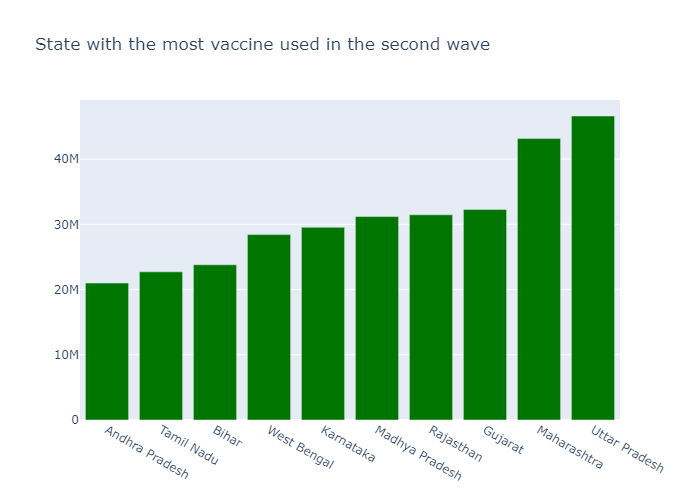

In [39]:
fig = go.Figure()
fig.add_trace(go.Bar(x=top_10_vaccine['state'], y=top_10_vaccine['vaccine_used'],
              marker_color='#007500'))
fig.update_layout(title_text='State with the most vaccine used in the second wave')
fig.show('png')

In [40]:
vaccine_pivot= pd.pivot_table(vaccine_df,values = ['total dose'],index = 'yearmonth',columns ='state',aggfunc = max)


In [41]:
vaccine_pivot = vaccine_pivot.diff()
vaccine_pivot

total dose                                   \
state     Andaman and Nicobar Islands Andhra Pradesh Arunachal Pradesh   
yearmonth                                                                
2021-01                           NaN            NaN               NaN   
2021-02                        5929.0       540144.0           26340.0   
2021-03                       13949.0      2051402.0           55929.0   
2021-04                       82436.0      3853865.0          152629.0   
2021-05                       19894.0      3289713.0           92584.0   
2021-06                       52025.0      5834607.0          259348.0   
2021-07                      122676.0      5966039.0          252245.0   
2021-08                       11674.0      2173502.0           33494.0   

                                                         \
state          Assam      Bihar Chandigarh Chhattisgarh   
yearmonth                                                 
2021-01          NaN        NaN        NaN          NaN   
2021-02     192446.0   528660.0    16350.0     371018.0   
2021-03     875221.0  2102061.0    59144.0    1549445.0   
2021-04    1382379.0  4227882.0   130778.0    3592991.0   
2021-05    1656919.0  3340108.0   141018.0     669619.0   
2021-06    2885269.0  5591422.0   177370.0    2212817.0   
2021-07    3615325.0  8543442.0   290267.0    2500110.0   
2021-08    2065623.0  3392475.0   106675.0     815722.0   

                                                                         ...  \
state     Dadra and Nagar Haveli and Daman and Diu      Delhi       Goa  ...   
yearmonth                                                                ...   
2021-01                                        NaN        NaN       NaN  ...   
2021-02                                     7122.0   361591.0   19154.0  ...   
2021-03                                    25012.0   887626.0   99361.0  ...   
2021-04                                    61686.0  1977893.0  227737.0  ...   
2021-05                                   101403.0  2147391.0  179237.0  ...   
2021-06                                   231249.0  2474193.0  405067.0  ...   
2021-07                                   202559.0  2154106.0  393079.0  ...   
2021-08                                    35334.0   788442.0   69810.0  ...   

                                                                            \
state     Puducherry     Punjab  Rajasthan    Sikkim Tamil Nadu  Telangana   
yearmonth                                                                    
2021-01          NaN        NaN        NaN       NaN        NaN        NaN   
2021-02       9177.0   135955.0   700857.0   17403.0   242157.0   324032.0   
2021-03      63499.0   762841.0  4559826.0   55079.0  2585469.0   848148.0   
2021-04     123111.0  2449546.0  7451700.0  129775.0  3041621.0  3512947.0   
2021-05      71464.0  1245182.0  3994383.0   35017.0  3148798.0  1284625.0   
2021-06     238140.0  1653216.0  7714715.0  234827.0  6546231.0  5006606.0   
2021-07     209757.0  2863003.0  7737574.0  164926.0  7394107.0  3661593.0   
2021-08      36137.0  1135784.0  2915042.0   10653.0  2486516.0   881884.0   

                                                           
state       Tripura Uttar Pradesh Uttarakhand West Bengal  
yearmonth                                                  
2021-01         NaN           NaN         NaN         NaN  
2021-02     87724.0     1234446.0    142087.0    878473.0  
2021-03    564521.0     4079255.0    560644.0   4374710.0  
2021-04    563149.0     6809920.0   1349966.0   5504509.0  
2021-05    374023.0     5777203.0    839889.0   3746187.0  
2021-06    939559.0    12946391.0   1482686.0   7171487.0  
2021-07    594858.0    16994629.0   1505201.0   7629076.0  
2021-08     70093.0     6171695.0    760126.0   2871680.0  

[8 rows x 36 columns]

In [42]:
vaccine_pivot['total vaccine'] = vaccine_pivot.sum(axis=1)

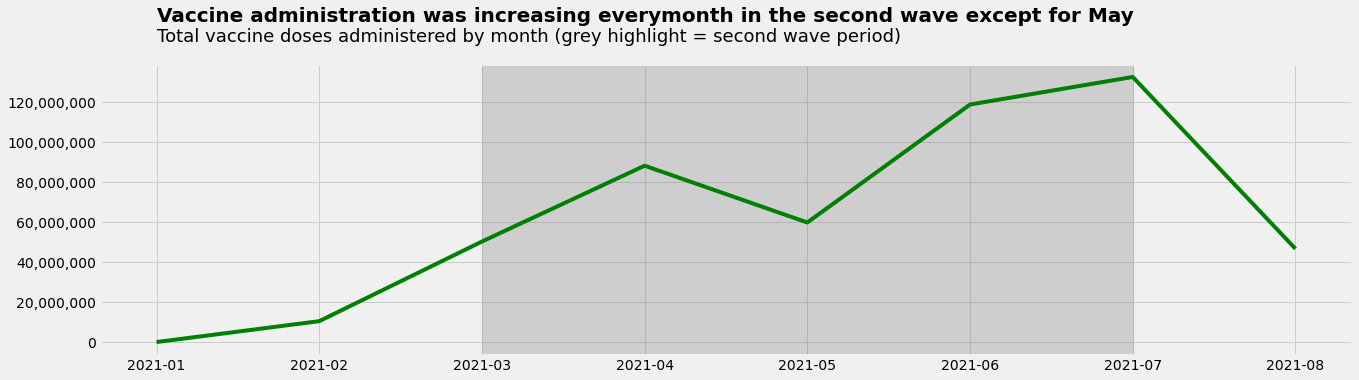

In [43]:
#Covid test increase each month 
fig,axes = plt.subplots(1,1,figsize = (20,5))
axes.ticklabel_format(style = 'plain')
axes.plot(vaccine_pivot.index,vaccine_pivot['total vaccine'],color = 'green')
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes.text(0,160000000,'Vaccine administration was increasing everymonth in the second wave except for May',weight = 'bold',size = 20)
axes.text(0,150000000,'Total vaccine doses administered by month (grey highlight = second wave period)',size = 18)

axes.axvspan(xmin=2.0, xmax=6.0, ymin=0,
           alpha=0.3, color='grey')


Vaccine administeration was increasing every month except for May 2021 which was the month that was the peak of covid-19

In [44]:
first_dose_pivot = pd.pivot_table(vaccine_df,values = ['first dose'],index = 'yearmonth',columns ='state',aggfunc = max)

Let's see how many people are vaccinated in the peak of covid (2021-05)

In [45]:
first_dose_pivot['total first dose'] = first_dose_pivot.sum(axis=1)
first_dose_5 = int(first_dose_pivot.loc['2021-05','total first dose'])
not_get_first = 1380000000-first_dose_5

In [46]:
first_dose_5

168393525

India population 2021 is roughly 1.38 billion

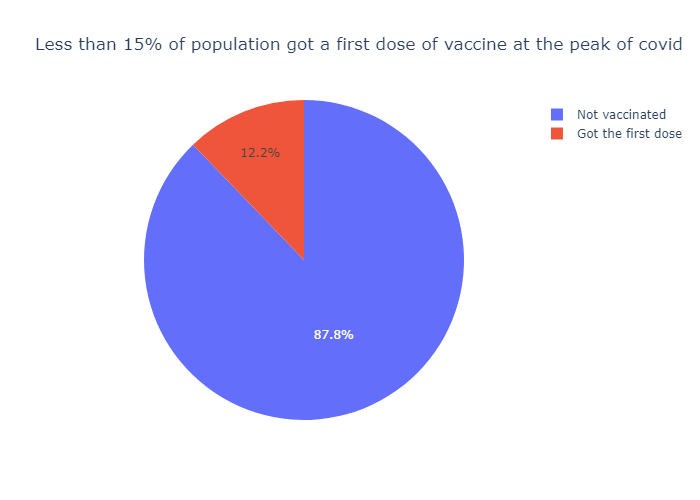

In [47]:
fig = go.Figure(data=[go.Pie(labels=['Got the first dose','Not vaccinated'], values=[first_dose_5,not_get_first])])
fig.update_layout(title ='Less than 15% of population got a first dose of vaccine at the peak of covid')
fig.show('png')

In [48]:
second_dose_pivot = pd.pivot_table(vaccine_df,values = ['second dose'],index = 'yearmonth',columns ='state',aggfunc = max)


In [49]:
second_dose_pivot['total second dose'] = second_dose_pivot.sum(axis=1)
second_dose_5 = int(second_dose_pivot.loc['2021-05','total second dose'])
not_get_second = 1380000000-second_dose_5

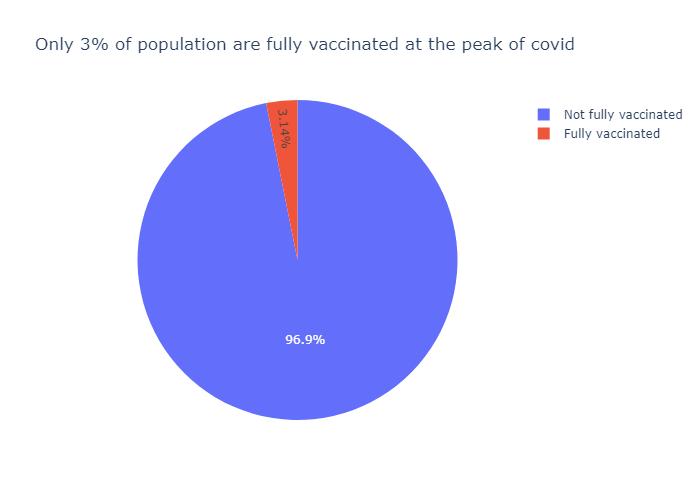

In [50]:
fig = go.Figure(data=[go.Pie(labels=['Fully vaccinated','Not fully vaccinated'], values=[second_dose_5,not_get_second])])
fig.update_layout(title ='Only 3% of population are fully vaccinated at the peak of covid')
fig.show('png')

# Conclusion
There were 2 waves of covid. The first one was around 2020-09, the second one was around March 2021 - July 2021 and hit its peak in May.In the second wave, India’s testing for covid-19 was increasing every month. We found that Maharashtra was the state with the most confirmed cases and highest deaths. However, the most vaccinated state was Uttar Pradesh. Maybe it is because of the difference in population.
We need to investigate this further. Vaccine administration too was increasing every month except for May 2021 when covid cases reached new heights (it must be a hard month for them). In May 2021 less than 15% of the population got at least 1 dose of vaccine and around 3% of the population are fully vaccinated. Covishield is the main vaccine India uses.